In [14]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

In [15]:
import pandas as pd

data = pd.read_csv('../data/merged.csv')
data.head(5)

,Unnamed: 0,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,distance
0,0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
1,1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
2,2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
3,3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
4,4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319


In [16]:
data.columns

Index(['Unnamed: 0', 'id', 'order_id', 'driver_id', 'driver_action', 'lat',
       'lng', 'Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time', 'distance'],
      dtype='object')

In [17]:
#Drop uneccesary columns
drop_col = ['Unnamed: 0','id','Trip Origin','Trip Destination', 'Trip Start Time','Trip End Time']
data = data.drop(columns=drop_col)
data.head(5)

,order_id,driver_id,driver_action,lat,lng,Trip ID,distance
0,392001,243828,accepted,6.602207,3.270465,392001,20.984319
1,392001,243588,rejected,6.592097,3.287445,392001,20.984319
2,392001,243830,rejected,6.596133,3.281784,392001,20.984319
3,392001,243539,rejected,6.596142,3.280526,392001,20.984319
4,392001,171653,rejected,6.609232,3.288800,392001,20.984319


In [18]:
#Identify non-numeric cols
import numpy as np

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['driver_action']


In [19]:
#Labelencode the non-numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,order_id,driver_id,driver_action,lat,lng,Trip ID,distance
0,392001,243828,0,6.602207,3.270465,392001,20.984319
1,392001,243588,1,6.592097,3.287445,392001,20.984319
2,392001,243830,1,6.596133,3.281784,392001,20.984319
3,392001,243539,1,6.596142,3.280526,392001,20.984319
4,392001,171653,1,6.609232,3.288800,392001,20.984319


In [20]:
struct_data.to_csv('../data/struct_data.csv')

In [21]:
#Apply notears Algorithm
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

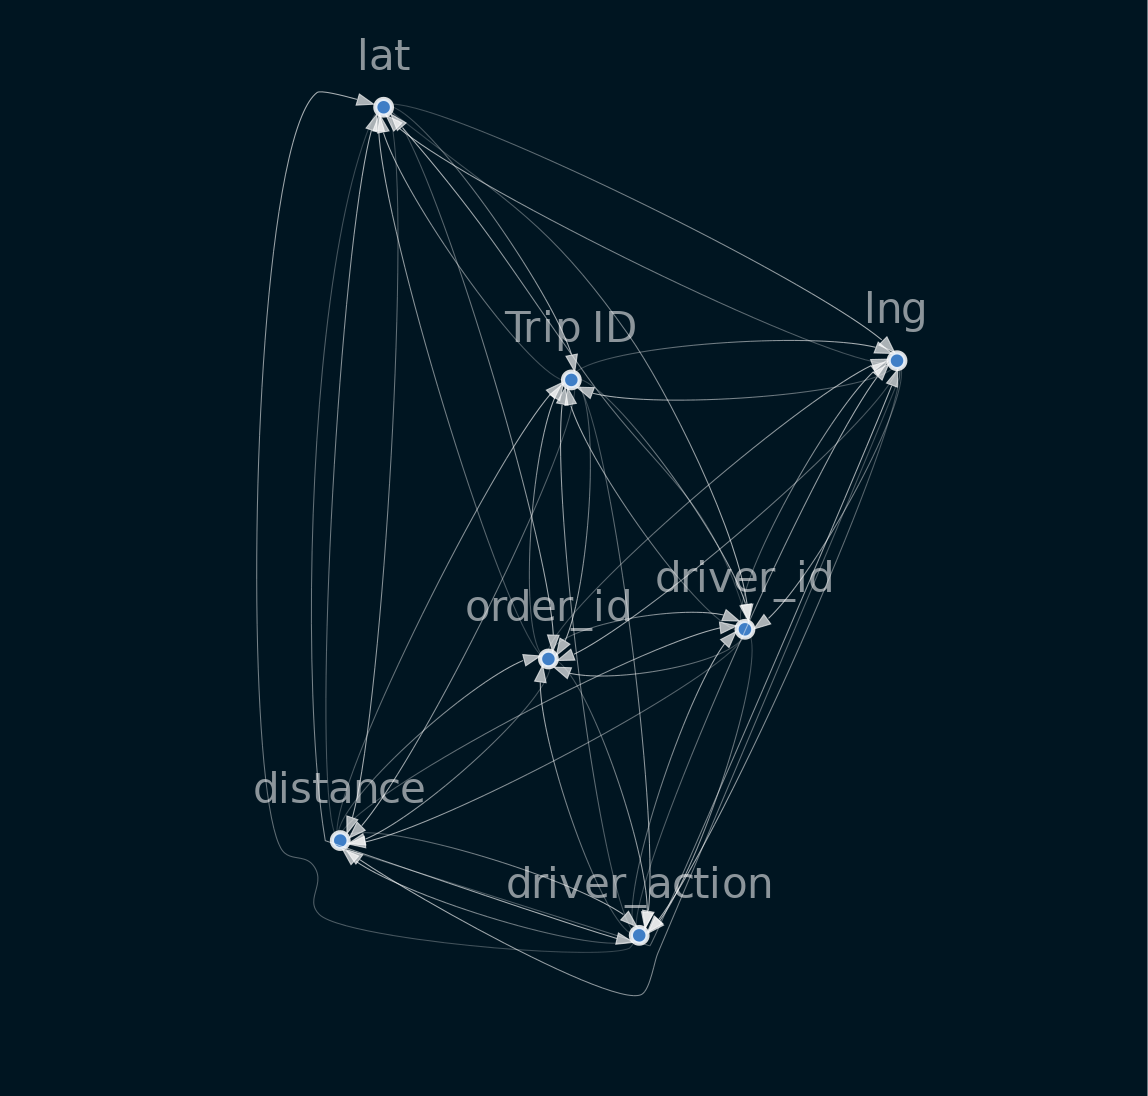

In [22]:
#With out Thresholding
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

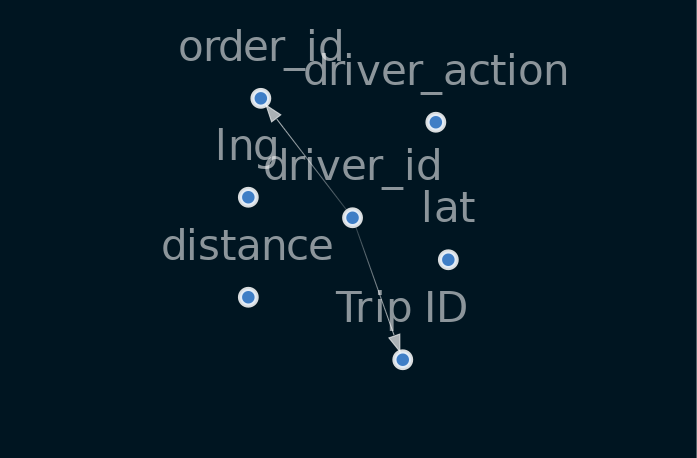

In [23]:
#With 50% of Threshold
sm.remove_edges_below_threshold(0.5)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

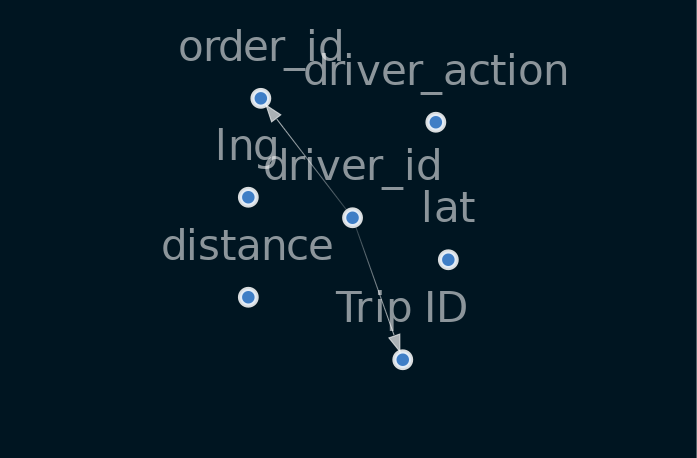

In [24]:
#With 80% of Threshold
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))